In [1]:
#load in file
filepath = 'facebook-messages\messages\inbox\MirrenWilson_DIFAxVcXfw\message_1.json'

In [2]:
import json
with open(filepath) as file:
    chat_history = json.load(file)

In [3]:
#Reading through the messages
chat_history

{'participants': [{'name': 'Mirren Wilson'}, {'name': 'Daniel Howes'}],
 'messages': [{'sender_name': 'Daniel Howes',
   'timestamp_ms': 1559936084929,
   'content': "Yeah you'd end up just getting worse, think this might be a terminal illness \n\nHe's got such a cushy job as well, I can't wait till I get my doggy \n\nOkay okay I'll watch it hahaha! I really like comic villains to be fair, Heath Ledgers joker and Thanos are good, I really like the villains in game of thrones although they're a bit different, you?\n\nYou can never have too much garlic what are you even on about, it's the perfect ingredient ð\x9f\x98\x89\n\nI can't judge him too much because I'm on my phone all the time at work as well though ð\x9f\x98\x82 Oh my god I always say that! It doesn't make me look old does it? ð\x9f\x98\xad You did think I was 25 to be fair. I think I'm just using it to put off the gym tbh \n\nVery fancy! Drinking champagne on a Friday night! You may end up having to finish off some of that gi

In [4]:
#looking at keys and exploring data
chat_history.keys()

dict_keys(['participants', 'messages', 'title', 'is_still_participant', 'thread_type', 'thread_path'])

In [5]:
chat_history['messages']

[{'sender_name': 'Daniel Howes',
  'timestamp_ms': 1559936084929,
  'content': "Yeah you'd end up just getting worse, think this might be a terminal illness \n\nHe's got such a cushy job as well, I can't wait till I get my doggy \n\nOkay okay I'll watch it hahaha! I really like comic villains to be fair, Heath Ledgers joker and Thanos are good, I really like the villains in game of thrones although they're a bit different, you?\n\nYou can never have too much garlic what are you even on about, it's the perfect ingredient ð\x9f\x98\x89\n\nI can't judge him too much because I'm on my phone all the time at work as well though ð\x9f\x98\x82 Oh my god I always say that! It doesn't make me look old does it? ð\x9f\x98\xad You did think I was 25 to be fair. I think I'm just using it to put off the gym tbh \n\nVery fancy! Drinking champagne on a Friday night! You may end up having to finish off some of that gin collection ð\x9f\x98\x89 Go on a mad one I dare ya",
  'type': 'Generic'},
 {'sender_

In [9]:
import pandas as pd

In [10]:
#put the data into a pandas dataframe
messages = pd.DataFrame(chat_history['messages'])

In [11]:
#Convert the facebook millisecond timestamp to a useable date format
def convertion(timestamp):
    return pd.to_datetime(timestamp,unit='ms')

In [12]:
convertion(1559935327750)

Timestamp('2019-06-07 19:22:07.750000')

In [13]:
#apply the convertion to the dataframe 
messages['date'] = messages['timestamp_ms'].apply(convertion)

In [14]:
messages

,content,photos,reactions,sender_name,timestamp_ms,type,date
0,"Yeah you'd end up just getting worse, think th...",NaN,NaN,Daniel Howes,1559936084929,Generic,2019-06-07 19:34:44.929
1,AA maybe? Abba Anonymous. I think that would b...,NaN,NaN,Mirren Wilson,1559935327750,Generic,2019-06-07 19:22:07.750
2,"I think you might have an addiction, is there ...",NaN,NaN,Daniel Howes,1559934424050,Generic,2019-06-07 19:07:04.050
3,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,NaN,NaN,Mirren Wilson,1559933063461,Generic,2019-06-07 18:44:23.461
4,"She's Swedish and annoying as fuck, fair warni...",NaN,NaN,Daniel Howes,1559932637205,Generic,2019-06-07 18:37:17.205
5,Hahahha thatâs okay! Yeah itâs pretty insi...,NaN,NaN,Mirren Wilson,1559930214321,Generic,2019-06-07 17:56:54.321
6,"Thats just my luck, I'll ask the boys but I do...",NaN,NaN,Daniel Howes,1559928558560,Generic,2019-06-07 17:29:18.560
7,Like I wasnât going to rock up in my uniform...,NaN,NaN,Mirren Wilson,1559927657931,Generic,2019-06-07 17:14:17.931
8,You picked a bad weekend hahaha! So itâs reh...,NaN,NaN,Mirren Wilson,1559927584453,Generic,2019-06-07 17:13:04.453
9,"Okay I'll have a look at those, slightly dishe...",NaN,NaN,Daniel Howes,1559926552512,Generic,2019-06-07 16:55:52.512


In [15]:
#defining and applying more date types

def month(date):
    return date.month
def year(date):
    return date.year
def day(date):
    return date.day
def daysinmonth(date):
    return date.dayofyear	

In [16]:
messages['month'] = messages['date'].apply(month)
messages['year'] = messages['date'].apply(year)
messages['day'] = messages['date'].apply(day)
messages['date2'] = messages['date'].apply(daysinmonth)
messages

,content,photos,reactions,sender_name,timestamp_ms,type,date,month,year,day,date2
0,"Yeah you'd end up just getting worse, think th...",NaN,NaN,Daniel Howes,1559936084929,Generic,2019-06-07 19:34:44.929,6,2019,7,158
1,AA maybe? Abba Anonymous. I think that would b...,NaN,NaN,Mirren Wilson,1559935327750,Generic,2019-06-07 19:22:07.750,6,2019,7,158
2,"I think you might have an addiction, is there ...",NaN,NaN,Daniel Howes,1559934424050,Generic,2019-06-07 19:07:04.050,6,2019,7,158
3,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,NaN,NaN,Mirren Wilson,1559933063461,Generic,2019-06-07 18:44:23.461,6,2019,7,158
4,"She's Swedish and annoying as fuck, fair warni...",NaN,NaN,Daniel Howes,1559932637205,Generic,2019-06-07 18:37:17.205,6,2019,7,158
5,Hahahha thatâs okay! Yeah itâs pretty insi...,NaN,NaN,Mirren Wilson,1559930214321,Generic,2019-06-07 17:56:54.321,6,2019,7,158
6,"Thats just my luck, I'll ask the boys but I do...",NaN,NaN,Daniel Howes,1559928558560,Generic,2019-06-07 17:29:18.560,6,2019,7,158
7,Like I wasnât going to rock up in my uniform...,NaN,NaN,Mirren Wilson,1559927657931,Generic,2019-06-07 17:14:17.931,6,2019,7,158
8,You picked a bad weekend hahaha! So itâs reh...,NaN,NaN,Mirren Wilson,1559927584453,Generic,2019-06-07 17:13:04.453,6,2019,7,158
9,"Okay I'll have a look at those, slightly dishe...",NaN,NaN,Daniel Howes,1559926552512,Generic,2019-06-07 16:55:52.512,6,2019,7,158


In [17]:
#importing the natural language toolkit 

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
#I will be using the vader sentiment analysis pack for this project

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
sentiment_analysis = SentimentIntensityAnalyzer()

In [21]:
#testing the sentiment analyser

sentiment_analysis.polarity_scores('i have no opinion on james')

{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}

In [22]:
#I will be using the compound results

def polarity(text):
    return sentiment_analysis.polarity_scores(text)['compound']

This was an attempt to run the sentiment analysis on my text, however I ran into a recursion error, I left in my commented code to document my own learning.

In [96]:
#import nltk
#import re

#def letters_only(text):
    #re.sub("[^a-zA-Z]",  # Search for all non-letters
                          #" ",          # Replace all non-letters with spaces
                          #str(messages))
    #return letters_only(text)
#messages['letters only'] = messages['content'].apply(letters_only)

In [24]:
#import sys
#sys.setrecursionlimit(4000)


#messages['letters_only'] = messages['content'].apply(letters_only)

In [25]:
# coding: UTF-8
#try:
    #title_trans=''.join(chr(c) if chr(c).isupper() or chr(c).islower() else '' for c in range(256))
#except Exception:
    #pass

In [26]:
#try:
    #messages['letters_only'] = messages['content'].apply(title_trans)
#except Exception:
    #pass

In [27]:
#messages

In [28]:
#messages['result'] = messages['content'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

In [29]:
#messages['no numbers'] = messages['content'].astype(str).str.replace('\D+', '')


In [30]:
#messages

In [97]:
#Cleaning the data by removing digits

messages['no numbers'] = messages['content'].astype(str).str.replace('\d+', '')

In [98]:
messages

,content,photos,reactions,sender_name,timestamp_ms,type,date,month,year,day,date2,only numbers,sentiment,yoyo,wordcount,no numbers
0,"Yeah you'd end up just getting worse, think th...",NaN,NaN,Daniel Howes,1559936084929,Generic,2019-06-07 19:34:44.929,6,2019,7,158,"Yeah you'd end up just getting worse, think th...",0.9306,"[Yeah, you, d, end, up, just, getting, worse, ...",180,"Yeah you'd end up just getting worse, think th..."
1,AA maybe? Abba Anonymous. I think that would b...,NaN,NaN,Mirren Wilson,1559935327750,Generic,2019-06-07 19:22:07.750,6,2019,7,158,AA maybe? Abba Anonymous. I think that would b...,0.6316,"[AA, maybe, Abba, Anonymous, I, think, that, w...",158,AA maybe? Abba Anonymous. I think that would b...
2,"I think you might have an addiction, is there ...",NaN,NaN,Daniel Howes,1559934424050,Generic,2019-06-07 19:07:04.050,6,2019,7,158,"I think you might have an addiction, is there ...",0.9687,"[I, think, you, might, have, an, addiction, is...",154,"I think you might have an addiction, is there ..."
3,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,NaN,NaN,Mirren Wilson,1559933063461,Generic,2019-06-07 18:44:23.461,6,2019,7,158,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,0.9380,"[SHE, IS, SWEDISH, Oh, my, god, Sheâ, s, perfe...",175,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...
4,"She's Swedish and annoying as fuck, fair warni...",NaN,NaN,Daniel Howes,1559932637205,Generic,2019-06-07 18:37:17.205,6,2019,7,158,"She's Swedish and annoying as fuck, fair warni...",0.9300,"[She, s, Swedish, and, annoying, as, fuck, fai...",149,"She's Swedish and annoying as fuck, fair warni..."
5,Hahahha thatâs okay! Yeah itâs pretty insi...,NaN,NaN,Mirren Wilson,1559930214321,Generic,2019-06-07 17:56:54.321,6,2019,7,158,Hahahha thatâs okay! Yeah itâs pretty insi...,0.9733,"[Hahahha, thatâ, s, okay, Yeah, itâ, s, pretty...",216,Hahahha thatâs okay! Yeah itâs pretty insi...
6,"Thats just my luck, I'll ask the boys but I do...",NaN,NaN,Daniel Howes,1559928558560,Generic,2019-06-07 17:29:18.560,6,2019,7,158,"Thats just my luck, I'll ask the boys but I do...",0.9929,"[Thats, just, my, luck, I, ll, ask, the, boys,...",232,"Thats just my luck, I'll ask the boys but I do..."
7,Like I wasnât going to rock up in my uniform...,NaN,NaN,Mirren Wilson,1559927657931,Generic,2019-06-07 17:14:17.931,6,2019,7,158,Like I wasnât going to rock up in my uniform...,0.6124,"[Like, I, wasnâ, t, going, to, rock, up, in, m...",42,Like I wasnât going to rock up in my uniform...
8,You picked a bad weekend hahaha! So itâs reh...,NaN,NaN,Mirren Wilson,1559927584453,Generic,2019-06-07 17:13:04.453,6,2019,7,158,You picked a bad weekend hahaha! So itâs reh...,0.8547,"[You, picked, a, bad, weekend, hahaha, So, itâ...",227,You picked a bad weekend hahaha! So itâs reh...
9,"Okay I'll have a look at those, slightly dishe...",NaN,NaN,Daniel Howes,1559926552512,Generic,2019-06-07 16:55:52.512,6,2019,7,158,"Okay I'll have a look at those, slightly dishe...",0.9869,"[Okay, I, ll, have, a, look, at, those, slight...",251,"Okay I'll have a look at those, slightly dishe..."


In [99]:
#applying the sentiment 

messages['sentiment'] = messages['no numbers'].apply(polarity)

In [34]:
messages

,content,photos,reactions,sender_name,timestamp_ms,type,date,month,year,day,date2,only numbers,sentiment
0,"Yeah you'd end up just getting worse, think th...",NaN,NaN,Daniel Howes,1559936084929,Generic,2019-06-07 19:34:44.929,6,2019,7,158,"Yeah you'd end up just getting worse, think th...",0.9306
1,AA maybe? Abba Anonymous. I think that would b...,NaN,NaN,Mirren Wilson,1559935327750,Generic,2019-06-07 19:22:07.750,6,2019,7,158,AA maybe? Abba Anonymous. I think that would b...,0.6316
2,"I think you might have an addiction, is there ...",NaN,NaN,Daniel Howes,1559934424050,Generic,2019-06-07 19:07:04.050,6,2019,7,158,"I think you might have an addiction, is there ...",0.9687
3,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,NaN,NaN,Mirren Wilson,1559933063461,Generic,2019-06-07 18:44:23.461,6,2019,7,158,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,0.9380
4,"She's Swedish and annoying as fuck, fair warni...",NaN,NaN,Daniel Howes,1559932637205,Generic,2019-06-07 18:37:17.205,6,2019,7,158,"She's Swedish and annoying as fuck, fair warni...",0.9300
5,Hahahha thatâs okay! Yeah itâs pretty insi...,NaN,NaN,Mirren Wilson,1559930214321,Generic,2019-06-07 17:56:54.321,6,2019,7,158,Hahahha thatâs okay! Yeah itâs pretty insi...,0.9733
6,"Thats just my luck, I'll ask the boys but I do...",NaN,NaN,Daniel Howes,1559928558560,Generic,2019-06-07 17:29:18.560,6,2019,7,158,"Thats just my luck, I'll ask the boys but I do...",0.9929
7,Like I wasnât going to rock up in my uniform...,NaN,NaN,Mirren Wilson,1559927657931,Generic,2019-06-07 17:14:17.931,6,2019,7,158,Like I wasnât going to rock up in my uniform...,0.6124
8,You picked a bad weekend hahaha! So itâs reh...,NaN,NaN,Mirren Wilson,1559927584453,Generic,2019-06-07 17:13:04.453,6,2019,7,158,You picked a bad weekend hahaha! So itâs reh...,0.8547
9,"Okay I'll have a look at those, slightly dishe...",NaN,NaN,Daniel Howes,1559926552512,Generic,2019-06-07 16:55:52.512,6,2019,7,158,"Okay I'll have a look at those, slightly dishe...",0.9869


In [103]:
messages.loc[9, 'content']

"Okay I'll have a look at those, slightly disheartening that there isn't much on this weekend ð\x9f\x98\x82 Ooh what shows that? Would that not be ridiculously off putting? I guess you're used to it though haha\n\nI would have just got a takeaway at that point I think hahaha. There's big competition where I'm from because most people drink Yorkshire tea, it's a big deal \n\nYou'd just scream at her to play abba wouldn't you ð\x9f\x98\x89 My dads big into home automation so he got me one, it was creepy though...there was a 'passionate' light setting which was like a dark red ð\x9f\x98\x82 well done! Doing your part for the climate ð\x9f\x98\x89\n\nYou should see some of the girls in Essex, it's actually impressive. It was really good but I just stopped watching it for some reason, I think it's cos I was rooting for the Northern Irish police guy hahaah\n\nIt wouldn't be a train if it wasn't horrifically delayed though let's be honest. Wouldn't have met you if my train was actually on tim

In [104]:
#Finding mean results by sender name 

messages.groupby('sender_name').mean()

,timestamp_ms,month,year,day,date2,sentiment,wordcount
sender_name,,,,,,,
Daniel Howes,1.559289e+12,5.560811,2019.0,13.277027,150.662162,0.439931,82.878378
Mirren Wilson,1.559281e+12,5.544715,2019.0,13.699187,150.585366,0.556798,106.479675


In [107]:
year_month = messages.groupby(['month', 'year', 'sender_name']).mean().reset_index()

In [108]:
#Finding mean results by month

year_month

,month,year,sender_name,timestamp_ms,day,date2,sentiment,wordcount
0,5,2019,Daniel Howes,1.558864e+12,25.723077,145.723077,0.590102,70.092308
1,5,2019,Mirren Wilson,1.558858e+12,25.625000,145.625000,0.607736,85.589286
2,6,2019,Daniel Howes,1.559622e+12,3.530120,154.530120,0.322328,92.891566
3,6,2019,Mirren Wilson,1.559635e+12,3.731343,154.731343,0.514224,123.940299


In [39]:
#Finding sentiment by month
Dan = year_month[year_month['sender_name'] == 'Daniel Howes']['sentiment'].values

In [40]:
Dan

array([0.59010154, 0.32232771])

In [41]:
Mirren = year_month[year_month['sender_name'] == 'Mirren Wilson']['sentiment'].values

In [42]:
Mirren

array([0.60773571, 0.51422388])

In [43]:
#Plotting the sentiment change over month in matplotlib

import matplotlib.pyplot as plt 

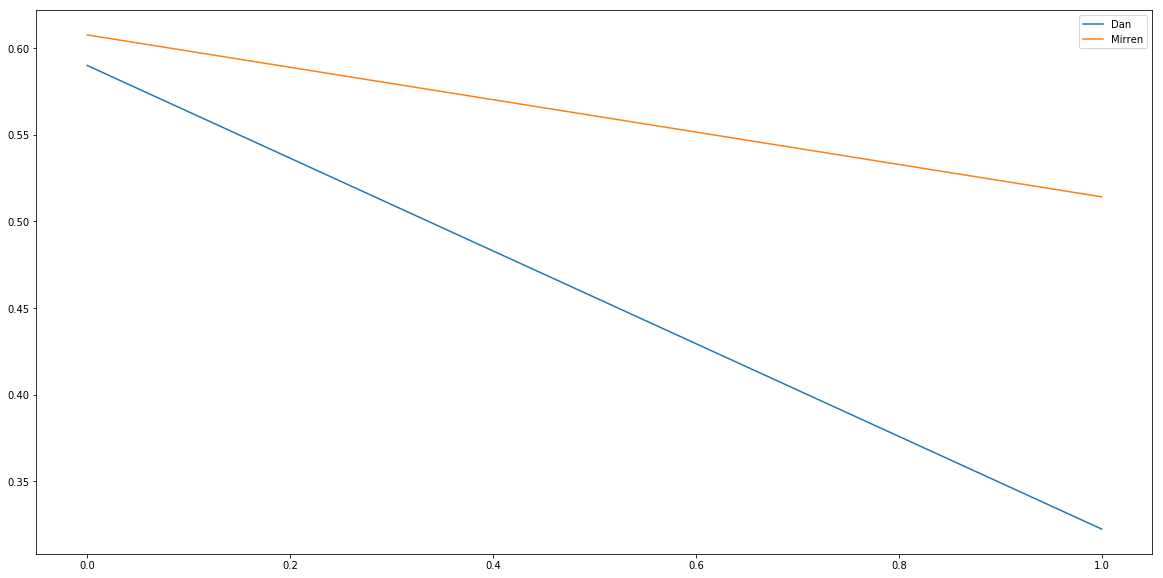

In [44]:
plt.figure(figsize = (20,10))
plt.plot(Dan,label = 'Dan')
plt.plot(Mirren,label = 'Mirren')
plt.legend()

In [45]:
#further looking into means

date = messages.groupby(['date', 'month', 'sender_name']).mean().reset_index()

In [46]:
date

,date,month,sender_name,timestamp_ms,year,day,date2,sentiment
0,2019-05-18 00:36:47.750,5,Mirren Wilson,1558139807750,2019,18,138,0.4939
1,2019-05-19 23:10:11.367,5,Daniel Howes,1558307411367,2019,19,139,0.9041
2,2019-05-19 23:35:10.932,5,Mirren Wilson,1558308910932,2019,19,139,0.7177
3,2019-05-20 08:31:58.745,5,Daniel Howes,1558341118745,2019,20,140,0.0000
4,2019-05-20 08:32:03.851,5,Daniel Howes,1558341123851,2019,20,140,-0.3182
5,2019-05-20 08:32:11.163,5,Daniel Howes,1558341131163,2019,20,140,0.6908
6,2019-05-20 11:37:45.281,5,Mirren Wilson,1558352265281,2019,20,140,-0.4172
7,2019-05-20 12:35:15.166,5,Daniel Howes,1558355715166,2019,20,140,0.8619
8,2019-05-20 14:20:46.590,5,Mirren Wilson,1558362046590,2019,20,140,-0.4726
9,2019-05-20 15:17:23.198,5,Daniel Howes,1558365443198,2019,20,140,0.9423


In [109]:
#Attempting to plot sentiment over time 

Dan = date[date['sender_name'] == 'Daniel Howes']['sentiment'].values

In [110]:
Dan

array([ 0.9041,  0.    , -0.3182,  0.6908,  0.8619,  0.9423,  0.9381,
        0.92  ,  0.8718,  0.8055,  0.9719,  0.9683,  0.922 ,  0.9483,
        0.9407,  0.9762,  0.4019, -0.5093,  0.6705,  0.    , -0.6124,
       -0.5141,  0.7584,  0.    ,  0.8718,  0.0258,  0.8225,  0.8873,
        0.883 ,  0.7165,  0.1511,  0.9222,  0.9648, -0.6769,  0.792 ,
        0.9347,  0.9464,  0.989 ,  0.9417,  0.9782,  0.9679,  0.9361,
        0.9559,  0.6728,  0.8111,  0.1877,  0.9501, -0.3358,  0.8265,
        0.933 ,  0.956 ,  0.9705,  0.7717,  0.9541,  0.9728,  0.8668,
       -0.2023,  0.9891,  0.8268,  0.98  ,  0.9111, -0.7588, -0.4753,
        0.    ,  0.    ,  0.4814,  0.8074,  0.    ,  0.3612, -0.1779,
       -0.5106, -0.3657,  0.    ,  0.9534,  0.3382,  0.    ,  0.    ,
        0.3612,  0.6476, -0.4767,  0.9439,  0.5994, -0.2865,  0.5927,
        0.    , -0.3612, -0.6597,  0.    , -0.1027, -0.5719, -0.1027,
       -0.1779, -0.2732,  0.7429,  0.9688, -0.4404,  0.578 ,  0.9391,
        0.    ,  0.2

In [111]:
Mirren = date[date['sender_name'] == 'Mirren Wilson']['sentiment'].values

In [112]:
Mirren

array([ 0.4939,  0.7177, -0.4172, -0.4726,  0.3335,  0.9618,  0.9204,
        0.9622,  0.9465,  0.9829,  0.6935,  0.975 , -0.5541, -0.4267,
        0.862 , -0.4389, -0.6956,  0.8289,  0.2833,  0.6177,  0.4019,
        0.8049,  0.5255,  0.6696,  0.6239,  0.9212,  0.9882, -0.7458,
        0.59  ,  0.6886,  0.5106,  0.9436,  0.9696,  0.9839,  0.9359,
        0.9696,  0.7101,  0.9081,  0.9536,  0.6082,  0.9356,  0.8724,
        0.9851, -0.4608,  0.968 ,  0.9609,  0.9292,  0.9637,  0.9518,
        0.    ,  0.9621,  0.9584,  0.9699,  0.9649,  0.9647,  0.5719,
       -0.3474,  0.9209,  0.    ,  0.    ,  0.    ,  0.9725,  0.8029,
        0.    ,  0.8604,  0.3612, -0.4265,  0.    ,  0.4404,  0.    ,
        0.    ,  0.    ,  0.    ,  0.5859, -0.6808,  0.    , -0.128 ,
        0.    , -0.5421,  0.9079,  0.7633,  0.939 ,  0.9723,  0.9907,
        0.    ,  0.9964,  0.986 ,  0.9725,  0.9903,  0.9904,  0.9851,
        0.9035,  0.99  ,  0.9719, -0.7476,  0.8753,  0.    ,  0.3182,
        0.7449,  0.9

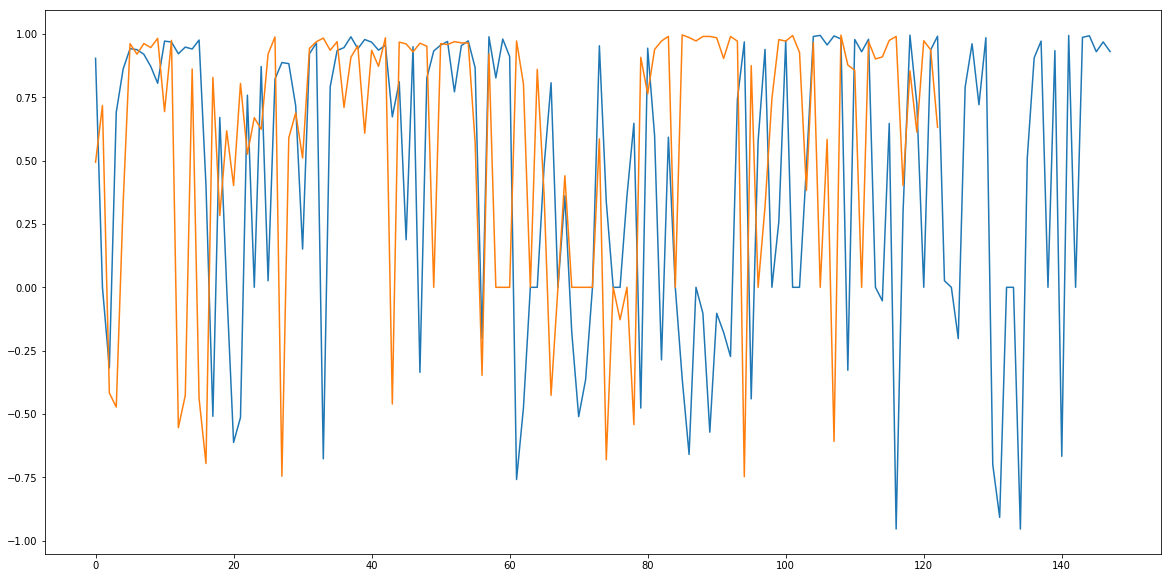

In [51]:
plt.figure(figsize = (20,10))
plt.plot(Dan,label = 'Dan')
plt.plot(Mirren,label = 'Mirren')

In [52]:
#Plotting the sentiment per day

day = messages.groupby(['day', 'month', 'sender_name']).mean().reset_index()

In [53]:
Dan = day[day['sender_name'] == 'Daniel Howes']['sentiment'].values

In [54]:
Mirren = day[day['sender_name'] == 'Mirren Wilson']['sentiment'].values

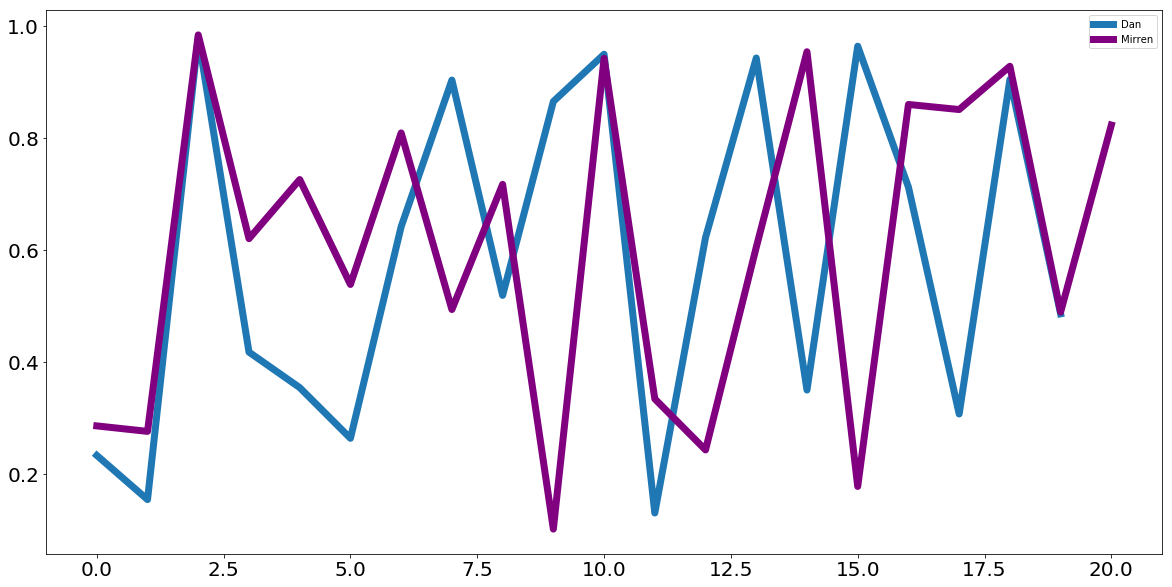

In [55]:
import matplotlib  
import numpy
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)


plt.figure(figsize = (20,10))
plt.plot(Dan,label='Dan',linewidth=7.0)
plt.plot(Mirren,label='Mirren', color='purple',linewidth=7.0)
plt.legend()



In [56]:
#results = set()
#messages['no numbers'].str.lower().str.split().apply(results.update)

In [57]:
#looking at the most common words 

from collections import Counter
variable2 = Counter(" ".join(messages['no numbers'].values.tolist()).split(" ")).items()
variable2

dict_items([('Yeah', 84), ("you'd", 3), ('end', 22), ('up', 110), ('just', 203), ('getting', 25), ('worse,', 2), ('think', 64), ('this', 37), ('might', 31), ('be', 230), ('a', 605), ('terminal', 1), ('illness', 1), ("\n\nHe's", 1), ('got', 67), ('such', 12), ('cushy', 1), ('job', 14), ('as', 98), ('well,', 6), ('I', 747), ("can't", 30), ('wait', 8), ('till', 2), ('get', 118), ('my', 212), ('doggy', 1), ('\n\nOkay', 4), ('okay', 3), ("I'll", 33), ('watch', 9), ('it', 314), ('hahaha!', 5), ('really', 58), ('like', 169), ('comic', 1), ('villains', 2), ('to', 634), ('fair,', 10), ('Heath', 1), ('Ledgers', 1), ('joker', 1), ('and', 365), ('Thanos', 1), ('are', 78), ('good,', 14), ('the', 521), ('in', 221), ('game', 7), ('of', 285), ('thrones', 1), ('although', 5), ("they're", 13), ('bit', 40), ('different,', 2), ('you?\n\nYou', 1), ('can', 75), ('never', 50), ('have', 171), ('too', 43), ('much', 51), ('garlic', 2), ('what', 65), ('you', 413), ('even', 37), ('on', 165), ('about,', 1), ("it's

In [59]:
#tokenizing the messages

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [60]:
messages['yoyo'] = messages['no numbers'].apply(tokenize)

In [61]:
messages['wordcount'] = messages['yoyo'].apply(lambda x: len(x) - x.count(" "))

In [62]:
messages

,content,photos,reactions,sender_name,timestamp_ms,type,date,month,year,day,date2,only numbers,sentiment,yoyo,wordcount
0,"Yeah you'd end up just getting worse, think th...",NaN,NaN,Daniel Howes,1559936084929,Generic,2019-06-07 19:34:44.929,6,2019,7,158,"Yeah you'd end up just getting worse, think th...",0.9306,"[Yeah, you, d, end, up, just, getting, worse, ...",180
1,AA maybe? Abba Anonymous. I think that would b...,NaN,NaN,Mirren Wilson,1559935327750,Generic,2019-06-07 19:22:07.750,6,2019,7,158,AA maybe? Abba Anonymous. I think that would b...,0.6316,"[AA, maybe, Abba, Anonymous, I, think, that, w...",158
2,"I think you might have an addiction, is there ...",NaN,NaN,Daniel Howes,1559934424050,Generic,2019-06-07 19:07:04.050,6,2019,7,158,"I think you might have an addiction, is there ...",0.9687,"[I, think, you, might, have, an, addiction, is...",154
3,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,NaN,NaN,Mirren Wilson,1559933063461,Generic,2019-06-07 18:44:23.461,6,2019,7,158,SHE IS SWEDISH!!! Oh my god. Sheâs perfect! ...,0.9380,"[SHE, IS, SWEDISH, Oh, my, god, Sheâ, s, perfe...",175
4,"She's Swedish and annoying as fuck, fair warni...",NaN,NaN,Daniel Howes,1559932637205,Generic,2019-06-07 18:37:17.205,6,2019,7,158,"She's Swedish and annoying as fuck, fair warni...",0.9300,"[She, s, Swedish, and, annoying, as, fuck, fai...",149
5,Hahahha thatâs okay! Yeah itâs pretty insi...,NaN,NaN,Mirren Wilson,1559930214321,Generic,2019-06-07 17:56:54.321,6,2019,7,158,Hahahha thatâs okay! Yeah itâs pretty insi...,0.9733,"[Hahahha, thatâ, s, okay, Yeah, itâ, s, pretty...",216
6,"Thats just my luck, I'll ask the boys but I do...",NaN,NaN,Daniel Howes,1559928558560,Generic,2019-06-07 17:29:18.560,6,2019,7,158,"Thats just my luck, I'll ask the boys but I do...",0.9929,"[Thats, just, my, luck, I, ll, ask, the, boys,...",232
7,Like I wasnât going to rock up in my uniform...,NaN,NaN,Mirren Wilson,1559927657931,Generic,2019-06-07 17:14:17.931,6,2019,7,158,Like I wasnât going to rock up in my uniform...,0.6124,"[Like, I, wasnâ, t, going, to, rock, up, in, m...",42
8,You picked a bad weekend hahaha! So itâs reh...,NaN,NaN,Mirren Wilson,1559927584453,Generic,2019-06-07 17:13:04.453,6,2019,7,158,You picked a bad weekend hahaha! So itâs reh...,0.8547,"[You, picked, a, bad, weekend, hahaha, So, itâ...",227
9,"Okay I'll have a look at those, slightly dishe...",NaN,NaN,Daniel Howes,1559926552512,Generic,2019-06-07 16:55:52.512,6,2019,7,158,"Okay I'll have a look at those, slightly dishe...",0.9869,"[Okay, I, ll, have, a, look, at, those, slight...",251


In [63]:
messages.groupby('sender_name').mean()

,timestamp_ms,month,year,day,date2,sentiment,wordcount
sender_name,,,,,,,
Daniel Howes,1.559289e+12,5.560811,2019.0,13.277027,150.662162,0.439931,82.878378
Mirren Wilson,1.559281e+12,5.544715,2019.0,13.699187,150.585366,0.556798,106.479675


In [64]:
#Finding the total number of messages sent 

len(messages[messages['sender_name']=='Daniel Howes'])

148

In [65]:
len(messages[messages['sender_name']=='Mirren Wilson'])

123

In [66]:
#Attempting to plot the wordcount per day over time 

day = messages.groupby(['day', 'month', 'sender_name']).mean().reset_index()

Dan2 = day[day['sender_name'] == 'Daniel Howes']['wordcount'].values
Mirren2 = day[day['sender_name'] == 'Mirren Wilson']['wordcount'].values

In [67]:
#Exporting the data to csv, I did some of my plotting in excel as I was getting frustrated with matplotlib and hadn't found seaborn and plotly yet.

export_csv = messages.to_csv (r'export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
export_csv

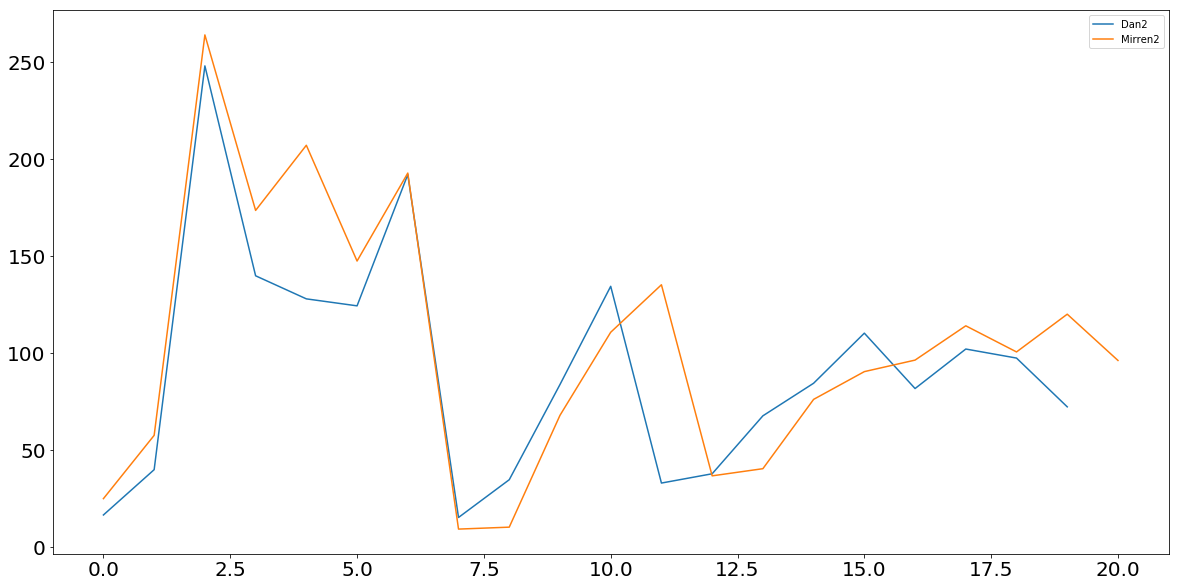

In [68]:
import matplotlib     
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)


plt.figure(figsize = (20,10))
plt.plot(Dan2,label='Dan2')
plt.plot(Mirren2,label='Mirren2')
plt.legend()


In [69]:
#Plotting the wordcount per message per person over time

date = messages.groupby(['date', 'day', 'sender_name']).mean().reset_index()

Dan2 = date[date['sender_name'] == 'Daniel Howes']['wordcount'].values
Mirren2 = date[date['sender_name'] == 'Mirren Wilson']['wordcount'].values



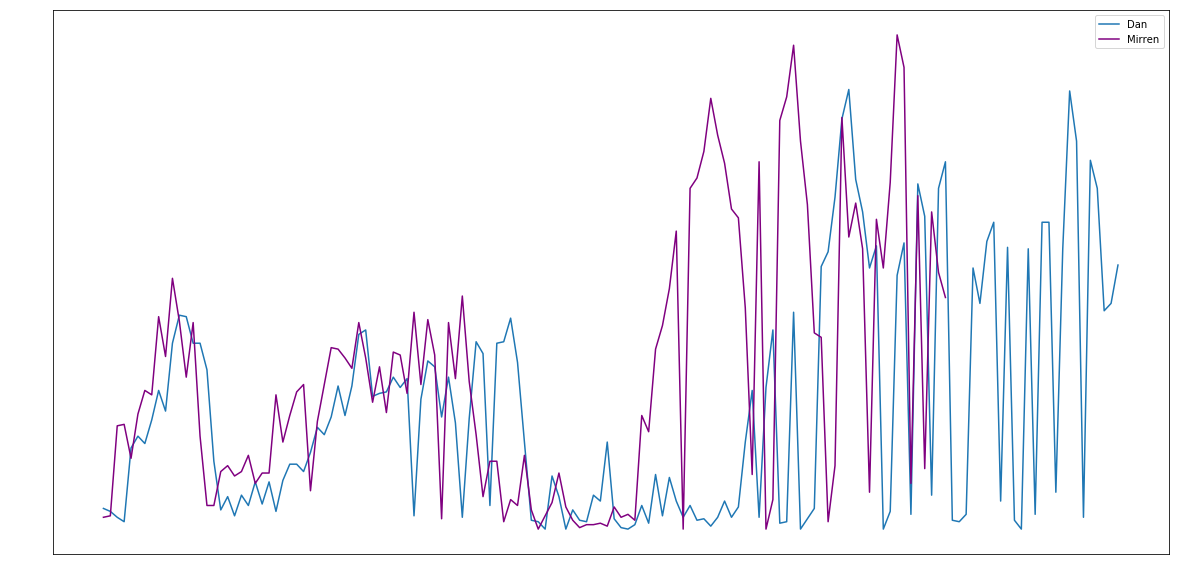

In [70]:
import matplotlib     
matplotlib.rc('xtick', labelsize=20, color = 'white')     
matplotlib.rc('ytick', labelsize=20, color = 'white')


plt.figure(figsize = (20,10))
plt.plot(Dan2,label='Dan')
plt.plot(Mirren2,label='Mirren', color='purple')
plt.legend()


Attempting to plot more stuff in matplotlib before switching to excel

In [89]:
#messages2 = messages.groupby(['date2','sender_name', 'wordcount']).sum()
#messages2

In [83]:
#sum (wordcount)

#Dan3 = messages2[messages2['sender_name'] == 'Daniel Howes']['sentiment'].values
#Dan = messages2[messages2['sender_name'] == 'Daniel Howes']['sentiment'].values
#print (messages.dropna(axis=1, how='all'))

#Dan3 = messages2[messages2['sender_name'] == 'Daniel Howes']['wordcount'].values

#Mirren3 = messages2[messages2['sender_name'] == 'Mirren Wilson']['wordcount'].values



In [84]:
#Dan3 = year_todate[year_todate['sender_name'] == 'Daniel Howes']['wordcount'].values

In [85]:
#Mirren3 = year_todate[year_todate['sender_name']=='Mirren Wilson']['wordcount'].values

In [86]:
#import matplotlib     
#matplotlib.rc('xtick', labelsize=20, color = 'black')     
#matplotlib.rc('ytick', labelsize=20, color = 'black')


#plt.figure(figsize = (20,10))
#plt.plot(Dan3,label='Dan')
#plt.plot(Mirren3,label='Mirren', color='black')
#plt.legend()

In [87]:
#day = messages.groupby(['day', 'month', 'sender_name']).mean().reset_index()

In [88]:
#Dan2 = day[day['sender_name'] == 'Daniel Howes']['wordcount'].values
#Mirren2 = day[day['sender_name'] == 'Mirren Wilson']['wordcount'].values